In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2021-09-22 14:04:50.890810: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# Linear Regression (once again):

<img src="images/LR.png">


Recall that Linear Regression with Gradient Descent involves the following steps:


***
__1. Collect predictions *(Forward Pass)*__ :
\begin{align}
\ \tilde{y_i} &= mx_i + b \\
\end{align}
***

***
__2. Compute Mean Squared Error / Loss:__
\begin{align}
\ L & = \frac{1}{N} \sum_{k=1}^N (y_k - \tilde{y_k})^2 \\
\end{align}
***

***
__3. Compute Derivatives _(Backward Pass)_ :__
\begin{align}
\ \frac{\partial L}{\partial m} &= -\frac{2}{N} \sum_{k=1}^N x_k(y_k - \tilde{y_k})\\
\end{align}
\begin{align}
\ \frac{\partial L}{\partial b} &= -\frac{2}{N} \sum_{k=1}^N (y_k - \tilde{y_k})\\
\end{align}
***

***
__4. Update Parameters:__
\begin{align}
\ m &= m - \alpha \frac{dL}{dm} \\
\ b &= b - \alpha \frac{dL}{db} \\
\end{align}
***

        

__Represented as a Computational Graph:__

<img src="images/comp-graph.png" alt="drawing" style="width:500px;"/>


<font color="green"> __This reveals the essential Buidling Blocks of a Deep Learning API__ </font>


1. __Tensors__
2. __Variables__
3. __Computational Graph__
4. __Automatic differentiation__


# 1. Tensors

Similar to numpy arrays, Tensors are multi-dimensioanl arrays of a uniform datatype. Unlike numpy arrays however, Tensors are immputable; i.e. you can't update the contents of a tensor.

Tensors are described by their:

- __Shape__: Length of each of the axes
- __Rank__: Number of axes
- __Size__: Total number of elements in the tensor.

Lets instantiate some basic Tensors

In [3]:
# Create a tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [4]:
# We can also specify the dtype

x = tf.constant([[1,2,3],[4,5,6],[7,8,9]], dtype=tf.float64)
print(x.dtype)

<dtype: 'float64'>


In [5]:
# Some other common methods of instantiating tensors:

# Constants
zeros = tf.zeros(shape=(1,6))
ones = tf.ones(shape=(2,3))
eights = tf.constant(8, shape=(3,4))

print("\n Zeros:\n ", zeros)
print("\n Ones:\n ", ones)
print("\n Eights: ", eights)


# Randomly sampled
normal = tf.random.normal(shape=(2,2), mean=0, stddev=1.)
uniform = tf.random.uniform(shape=(2,1), minval=0, maxval=10, dtype='int32')
poisson = tf.random.poisson((2,2), 5)


print("\n\n normal:\n ", normal)
print("\n uniform:\n ", uniform)
print("\n poisson: ", poisson)


 Zeros:
  tf.Tensor([[0. 0. 0. 0. 0. 0.]], shape=(1, 6), dtype=float32)

 Ones:
  tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)

 Eights:  tf.Tensor(
[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]], shape=(3, 4), dtype=int32)


 normal:
  tf.Tensor(
[[ 0.6198204  -1.7065594 ]
 [-0.93652344 -0.024314  ]], shape=(2, 2), dtype=float32)

 uniform:
  tf.Tensor(
[[1]
 [2]], shape=(2, 1), dtype=int32)

 poisson:  tf.Tensor(
[[11.  5.]
 [ 4.  3.]], shape=(2, 2), dtype=float32)


In [7]:
# Tensors of different ranks

# Scalar
rank_0_tensor = tf.constant(6) 
# Vector
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
# Matrix
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)

# Generalizable to arbitrary number of axes
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])


# Print the rank, shape and size of tensors
print( 'Rank of rank_2_tensor : ', tf.rank(rank_2_tensor) )
print( 'Rank of rank_3_tensor : ', tf.rank(rank_3_tensor) )
print()
print( 'Shape of rank_2_tensor : ', rank_2_tensor.shape )
print( 'Shape of rank_3_tensor : ', rank_3_tensor.shape )
print()
print( 'Size of rank_2_tensor : ', tf.size(rank_2_tensor) )
print( 'Size of rank_3_tensor : ', tf.size(rank_3_tensor) )

Rank of rank_2_tensor :  tf.Tensor(2, shape=(), dtype=int32)
Rank of rank_3_tensor :  tf.Tensor(3, shape=(), dtype=int32)

Shape of rank_2_tensor :  (3, 2)
Shape of rank_3_tensor :  (3, 2, 5)

Size of rank_2_tensor :  tf.Tensor(6, shape=(), dtype=int32)
Size of rank_3_tensor :  tf.Tensor(30, shape=(), dtype=int32)


#### a) A few basic math operations

In [8]:
a = tf.constant([[1.0, 2.0], 
                 [3.0, 4.0]])
b = tf.constant([[1.0, 1.0], 
                 [0.0, 1.0]])


print(tf.add(a, b), "\n")
print(tf.subtract(a,b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32) 



In [9]:
# Equivalently
print(a + b, "\n") # element-wise addition
print(a - b, "\n") # element-wise subtraction
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32) 



In [10]:
# Taking the absolute value
abs_a = tf.abs(a)

# Raising to a power
pow_ba = tf.pow(a,b)

print("\n ", abs_a)
print("\n ", pow_ba)


  tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)

  tf.Tensor(
[[1. 2.]
 [1. 4.]], shape=(2, 2), dtype=float32)


#### b) Indexing, Slicing and Reshaping

The indexing, slicing and reshaping rules are similar to NumPy.

- index starts at 0
- colons `:` are used for slices `start:stop:step`

In [11]:
t1 = tf.constant([0, 1, 2, 3, 4, 5, 6, 7])



print(t1[1:4])

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [12]:
# Alternatively

print(tf.slice(t1,
               begin=[1],
               size=[3]))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [13]:
# Reshaping

x = tf.constant([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

shape1 = [8,2]
shape2 = [4,4]
shape3 = [2,2,2,2]


# Create Tensors of different shape

a = tf.constant(x, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(x, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(x, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int32)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int32)

 c:
  tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]], shape=(2, 2, 2, 2), dtype=int32)


In [14]:
# Expanding rank of Tensors

t1 = tf.expand_dims(c, 0)
t2 = tf.expand_dims(c, 1)
t3 = tf.expand_dims(c, 3)

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


# Squeezing redundant dimensions

t1 = tf.squeeze(t1, 0)
t2 = tf.squeeze(t2, 1)
t3 = tf.squeeze(t3, 3)

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (1, 2, 2, 2, 2) 
 t2 shape:  (2, 1, 2, 2, 2) 
 t3 shape:  (2, 2, 2, 1, 2)

 After squeezing:
 t1 shape:  (2, 2, 2, 2) 
 t2 shape:  (2, 2, 2, 2) 
 t3 shape:  (2, 2, 2, 2)


#### c) Converting between Numpy Arrays and Tensorflow Tensors 

In [15]:
# Numpy array to tensor

Array = np.arange(12)
print('Numpy array: ', Array)


Tensor = tf.constant(Array, dtype=tf.float32)
print('Tensor: ', Tensor)

Numpy array:  [ 0  1  2  3  4  5  6  7  8  9 10 11]
Tensor:  tf.Tensor([ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.], shape=(12,), dtype=float32)


In [16]:
# Tensor to Numpy array 

Tensor.numpy()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
      dtype=float32)

# 2. Variables 

Recall that Tensors are immutabele. Hence the following will throw an error:

```
x = tf.constant([[1,1],
                 [1,1]], dtype=tf.int32)
x[1,1] = 0
---------------------------------------------------------------------------
TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

```

However, training a model means updating its parameters, which are a set of tensors. This is where `tf.Variable` comes in. A variable is a tensor whose value be changed.

In [17]:
# To create a variable, we need to provide an initial value

my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(initial_value=my_tensor)

print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Shape:  (2, 2)
DType:  <dtype: 'float32'>
As NumPy:  [[1. 2.]
 [3. 4.]]


In [18]:
# The state of a variable can be modified via its assign method

my_variable.assign(tf.zeros((2,2)))

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [19]:
# We can also re-assign a subset of the coefficients

my_variable[:, 1].assign([1,1])

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[0., 1.],
       [0., 1.]], dtype=float32)>

In [20]:
# We can also assign_add and assign_sub

print( my_variable.assign_add( tf.constant([[1.,1.],[1.,1.]]) ))
print( my_variable.assign_sub( tf.constant([[1.,1.],[1.,1.]]) ))

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [1., 2.]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[0., 1.],
       [0., 1.]], dtype=float32)>


In [21]:
# Math ops will return a Tensor. Most Tensor ops will also apply to Variables.

a = tf.Variable([[1.0, 2.0], 
                 [3.0, 4.0]])
b = tf.Variable(tf.ones(shape=(2,2), dtype=tf.float32))

# Element wise addition
print( a + b )

# Matrix multiplication
print( a @ b )

tf.Tensor(
[[2. 3.]
 [4. 5.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[3. 3.]
 [7. 7.]], shape=(2, 2), dtype=float32)


In [22]:
#  Except Variables cannot be reshaped

a.assign( tf.ones(shape=(3,2), dtype=tf.float32) )

ValueError: Cannot assign to variable Variable:0 due to variable shape (2, 2) and value shape (3, 2) are incompatible

In [23]:
# We can also name our variables

x = tf.Variable(["Hello world!"], tf.string, name='string_var')
y  = tf.Variable([3.14159, 2.71828], tf.float64, name='float_var')

print(x.name)
print(y.name)

# By default, variables in models will acquire unique names automatically.

string_var:0
float_var:0


# 3. Automatic Differentiation 

#### Gradient Tapes 

" TensorFlow provides the __tf.GradientTape__ API for __automatic differentiation__; that is, computing the gradient of a computation with respect to some inputs, usually __tf.Variables__. TensorFlow "records" relevant operations executed inside the context of a tf.GradientTape onto a "tape". TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation. "

In [24]:
# An example

x = tf.Variable(initial_value=5.0)

with tf.GradientTape() as tape:
    y = tf.square(x)

    
# dy/dx = 2x
dy_dx = tape.gradient(y, x)

print( dy_dx.numpy() )

10.0


__Gradient Tape tracks only trainable variables by default. However, it is also possible to track a constant tensor by calling `tape.watch()` on it:__

In [25]:
x = tf.constant(5.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.square(x)

    
# dy/dx = 2x
dy_dx = tape.gradient(y, x)

print( dy_dx.numpy() )

10.0


__GradientTape also works on list of inputs, and the inputs could be either scalars or high-dimensional tensors.__

In [26]:
w = tf.Variable(1.0, name='w')
b = tf.Variable(2.0, name='b')
x = 5.

with tf.GradientTape(persistent=True) as tape:
    y = (x * w + b)
    z = y**2


[dz_dw, dz_db] = tape.gradient(z, [w, b])

# dz_dw = 2x(x*w + b); dz_db = 2(x*w + b)
print( dz_dw.numpy() )
print( dz_db.numpy() )

70.0
14.0


In [27]:
# It's also possible to compute gradients w.r.t intermediate results

dz_dy = tape.gradient(z, y)
dz_dy.numpy()

14.0

__It is even possible to compute second order derivatives with nested gradient tapes__

For example:

\begin{align}
\ s &= \frac{1}{2}at^2 \\
\end{align}

then,

$$ v = \frac{ds}{dt} $$
$$ a = \frac{dv}{dt} $$

In [29]:
t = tf.Variable(0.)
a = tf.constant(9.8)

clock = tf.constant(1.); t.assign(clock)


with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        distance = (a/2)*(t**2)
    
    speed = inner_tape.gradient(distance, t)
acceleration = outer_tape.gradient(speed, t)


print(f'Speed at t={clock.numpy()} is {speed:.1f}')
print(f'Acceleration at t={clock.numpy()} is {acceleration:.1f}')

Speed at t=1.0 is 9.8
Acceleration at t=1.0 is 9.8


## 4. Back to Linear Regression: An end to end example 

Random guess for m and b: (array([-0.77773604]), array([-2.20269466]))


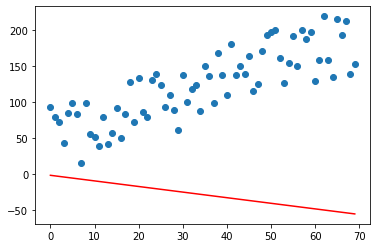

In [30]:
X = np.arange(0,70, 1, dtype='float64')
Y = 2*X
noise = 100*np.random.rand(70) 
Y = Y + noise

m = np.random.randn(1)
b = np.random.randn(1)
print(f'Random guess for m and b:',(m,b))

# Initial random prediction
Y_pred = m*X + b

plt.scatter(X, Y) 
plt.plot([X[0], X[-1]], [Y_pred[0], Y_pred[-1]], color='red')  # regression line
plt.show()

Previously, we had:

```
alpha = 0.0001                             # The learning Rate
epochs = 10000                             # The number of iterations to perform gradient descent

n = float(len(X))                          # Number of elements in X

# Training the Neural Net
for i in range(epochs): 
    Y_pred = m*X + b                       # The current predicted value of Y
    Loss = sum((Y - Y_pred )**2)/n         # Compute loss
    D_m = (-2/n) * sum(X * (Y - Y_pred))   # Derivative wrt m
    D_b = (-2/n) * sum(Y - Y_pred)         # Derivative wrt b
    m = m - alpha * D_m                    # Update m
    b = b - alpha * D_b                    # Update b
    
    if i%1000 == 0:
        print( "Epoch {}, Loss : {}".format(i, Loss))
print( "Epoch {}, Loss : {}".format(i, Loss))
```

In [31]:
M = tf.Variable(initial_value=m)
B = tf.Variable(initial_value=b)
X = tf.constant(X)
Y = tf.constant(Y)


alpha = 0.0001                             # The learning Rate
epochs = 10000                             # The number of iterations to perform gradient descent


# Training the Neural Net
for i in range(epochs): 
    
    with tf.GradientTape() as tape:
        Y_pred = M*X + B
        Loss = tf.reduce_mean((Y - Y_pred )**2)
        
    # Compute Gradient
    dL_dM, dL_dB = tape.gradient(Loss, [M, B])
    
    # Update Parameters
    M.assign_sub( alpha*dL_dM )
    B.assign_sub( alpha*dL_dB )
    
    if i%1000 == 0:
        print( "Epoch {}, Loss : {}".format(i, Loss.numpy()))
print( "Epoch {}, Loss : {}".format(i, Loss.numpy()))

Epoch 0, Loss : 27173.4455217168
Epoch 1000, Loss : 1576.7697391979707
Epoch 2000, Loss : 1501.2676748844071
Epoch 3000, Loss : 1433.0948045587702
Epoch 4000, Loss : 1371.539663110787
Epoch 5000, Loss : 1315.9598493141496
Epoch 6000, Loss : 1265.7753216044807
Epoch 7000, Loss : 1220.4623446546566
Epoch 8000, Loss : 1179.5480235727887
Epoch 9000, Loss : 1142.6053686807086
Epoch 9999, Loss : 1109.280523421594


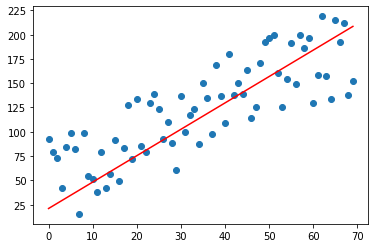

In [32]:
# Making predictions
Y_pred = M*X + B

plt.scatter(X, Y) 
plt.plot([X[0], X[-1]], [Y_pred[0], Y_pred[-1]], color='red')  # regression line
plt.show()